# How to simulate differential equations using scipy

In the code below, we will simulate the following autonomous system of ODEs: 

$$ \begin{cases} N' = 0.1 N \left( 1 - \frac{N}{100} \right) - 0.4 \frac{N}{10 + N} P \\ P' = 0.1 \frac{N}{10 + N} P - 0.08 P \end{cases} $$

(This is a predator-prey model, in which $N$ is the prey population, and $P$ is the predator population.)


## The newer, recommended way: use `solve_ivp`


In [1]:
from scipy.integrate import solve_ivp

The first thing in this code is the function $f: \mathbb{R} \times \mathbb{R}^n \to \mathbb{R}^n$ that defines the differential equation: 
$$ \vec{y}' = f(t, \vec{y}) $$

In the code, I'm referring to the vector $\vec{y}$ as `state`, because it represents the state of the dynamical system at time $t$. Also, since our differential equation is autonomous, we don't actually use the `t` argument in this example. But it must be in the function signature anyway. 


In [2]:
def f(t, state):
    N, P = state
    N_prime = 0.1*N*(1 - N/100) - 0.4*N/(10 + N)*P
    P_prime = 0.1*N/(10 + N)*P - 0.08*P
    return (N_prime, P_prime)

t_interval = (0, 1000)
initial_state = (20, 2)

solution = solve_ivp(f, t_interval, initial_state)


That's it! Now `solution` contains all the information about the solution. In particular, `solution.t` and `solution.y` contain the $t$ and $\vec{y}$ values. 


In [3]:
solution.t

array([0.00000000e+00, 1.91459535e-01, 2.10605489e+00, 2.12520084e+01,
       4.38702982e+01, 6.01769786e+01, 7.64836590e+01, 1.00221055e+02,
       1.30685139e+02, 1.73920528e+02, 2.19601920e+02, 2.65283312e+02,
       2.88530486e+02, 3.11777660e+02, 3.33263117e+02, 3.54748573e+02,
       3.74865204e+02, 3.94981835e+02, 4.22188413e+02, 4.60772048e+02,
       5.14563755e+02, 5.44604078e+02, 5.74644400e+02, 5.95962612e+02,
       6.17280825e+02, 6.37704313e+02, 6.58127801e+02, 6.84632624e+02,
       7.22307337e+02, 7.71036986e+02, 8.00632070e+02, 8.30227155e+02,
       8.58119953e+02, 8.86894072e+02, 9.07885900e+02, 9.28877727e+02,
       9.59161624e+02, 1.00000000e+03])

In [4]:
solution.y

array([[20.        , 20.20535432, 22.38454285, 54.34414823, 83.08084212,
        88.23392783, 88.30201007, 85.62915564, 80.07855889, 67.99698362,
        47.50215664, 20.17466026, 13.84941218, 22.24435645, 48.36920565,
        73.20319171, 80.21378655, 79.11133077, 73.10919017, 59.32877196,
        29.31676426, 15.02077423, 20.96940328, 45.36704502, 71.32301768,
        79.78967387, 79.08839051, 73.42836008, 60.25874351, 33.90904331,
        17.62723194, 17.19864423, 43.64893692, 74.83841105, 79.363598  ,
        76.94876354, 68.90670573, 51.79223547],
       [ 2.        ,  1.99494422,  1.94968293,  1.87483917,  2.22358701,
         2.60130207,  3.05444234,  3.84575207,  5.0973825 ,  7.25077352,
         9.23628292,  7.91050864,  5.13865427,  3.37642203,  3.13773215,
         3.56989055,  4.24450595,  5.07619622,  6.38343702,  8.341117  ,
         9.05792763,  6.23774975,  3.4862248 ,  3.15760766,  3.54621999,
         4.21556953,  5.05322344,  6.32050317,  8.23951703,  9.29160065,
   

In [6]:
# In case it's not clear what all those numbers mean: 
import pandas
pandas.DataFrame({"t": solution.t, "N(t)": solution.y[0], "P(t)": solution.y[1]})

,t,N(t),P(t)
0,0.000000,20.000000,2.000000
1,0.191460,20.205354,1.994944
2,2.106055,22.384543,1.949683
3,21.252008,54.344148,1.874839
4,43.870298,83.080842,2.223587
5,60.176979,88.233928,2.601302
6,76.483659,88.302010,3.054442
7,100.221055,85.629156,3.845752
8,130.685139,80.078559,5.097382
9,173.920528,67.996984,7.250774


So, for example, to plot the two time series, you could do something like the following: 


In [7]:
import matplotlib.pyplot as plt

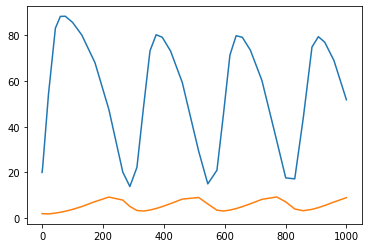

In [8]:
fig, ax = plt.subplots()
ax.plot(solution.t, solution.y[0])      # N (prey population)
ax.plot(solution.t, solution.y[1])      # P (predator population)


Or to plot a trajectory (integral curve), you could do the following: 


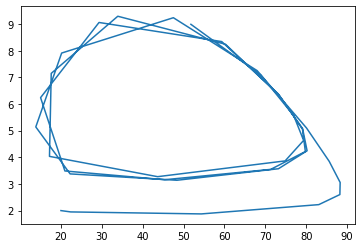

In [9]:
fig, ax = plt.subplots()
ax.plot(solution.y[0], solution.y[1])   # P vs N


Note that the above plots look very jagged! The reason for this is that we let `solve_ivp` choose the $t$ values for us automatically. It's usually pretty smart about choosing these $t$ values so that the error in each step is relatively small. But this can result in large gaps between consecutive $t$ values, as we see in the graphs above. 

There are **two ways** to deal this. 

**One way** is to specify the $t$ values that we want when we call `solve_ivp`: 


In [11]:
import numpy as np

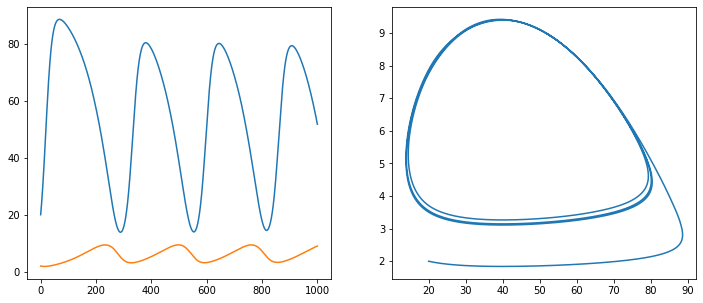

In [12]:
t_values = np.linspace(0, 1000, 2001)
solution = solve_ivp(f, t_interval, initial_state, t_eval=t_values)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
ax1.plot(solution.t, solution.y[0])     # N (prey population)
ax1.plot(solution.t, solution.y[1])     # P (predator population)
ax2.plot(solution.y[0], solution.y[1])  # P vs N


In [13]:
# Much smoother now! 

# Because there are many more data points: 2001 of them
pandas.DataFrame({"t": solution.t, "N": solution.y[0], "P": solution.y[1]})

,t,N,P
0,0.0,20.000000,2.000000
1,0.5,20.541059,1.987005
2,1.0,21.097647,1.974675
3,1.5,21.669871,1.962994
4,2.0,22.257809,1.951946
...,...,...,...
1996,998.0,52.813673,8.917997
1997,998.5,52.560574,8.936063
1998,999.0,52.305982,8.953875
1999,999.5,52.049876,8.971427


**The other way** is to specify `dense_output=True` when we call `solve_ivp`. This causes the `solution` object to have another attribute, called `sol`, which is a function-like object (“callable” in Python terminology) that approximates $\vec{y}(t)$. So you can plug in various values of $t$ to this: `solution.sol(t)`. 

For plotting with standard matplotlib functions, this ends up being equivalent to the first method. But if you happen to have an adaptive plotting function available, this can be a more efficient way to get a nice smooth plot. 


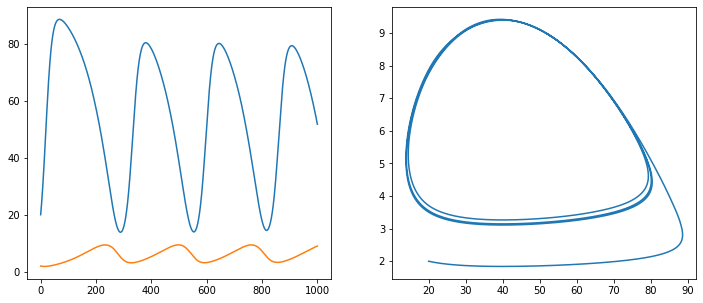

In [14]:
solution = solve_ivp(f, t_interval, initial_state, dense_output=True)

t = np.linspace(0, 1000, 2001)
y = solution.sol(t)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
ax1.plot(t, y[0])       # N (prey population)
ax1.plot(t, y[1])       # P (predator population)
ax2.plot(y[0], y[1])    # P vs N


In [15]:
# You can plug any t value into solution.sol! 
print(solution.sol(21))
print(solution.sol(21.6942))
print(solution.sol(22))


[53.87763821  1.87276032]
[55.15858864  1.87861939]
[55.71859978  1.88133058]


<br>
<br>
<br>
<br>
<br>


### A few other options you can pass to `solve_ivp`

There are many other options that you can pass to `solve_ivp`, which can allow you to do interesting things like 
- interrupt the solver based on certain conditions (`events`), 
- pass constant arguments to the function $f$ (`args`), 
- specify a maximum step size (`max_step`), 
- or specify error tolerances (`rtol` and `atol`). 

Another option is `method`, which lets you specify which ODE solving algorithm/method to use. The default is `"RK45"`, which uses a 5th order Runge–Kutta method (with 4th-order Runge–Kutta for error control). However, a *very good* alternative is `"LSODA"`. It's based on some pretty ancient Fortran code, but in this case, ancient isn't necessarily bad: it's code that has been stable for decades, and it's the most general-purpose solver that SciPy has. Also, it was written by Linda Petzold from one of our sister schools, UCSB! (Along with Alan Hindmarsh from LLNL.) 

Finally, another option that can be useful is `jac`, which allows you to specify the Jacobian of $f$, as a function with the same signature as $f$ itself (except that it should return a matrix instead of a vector, of course). This can help make certain ODE solvers more accurate and faster. Some methods (such as the default `"RK45"`) don't use the Jacobian at all, so there's no need to use this unless you're using another method such as `"LSODA"`. If you don't supply the Jacobian, then the algorithms that use it will still work, but they will have to resort to approximating the Jacobian, which takes slightly longer and is slightly less accurate. 


In [16]:
# A fancy way of calling solve_ivp, using LSODA and explicitly providing the Jacobian
def f(t, state):
    N, P = state
    return ( 0.1*N*(1 - N/100) - 0.4*N/(10 + N)*P, 0.1*N/(10 + N)*P - 0.08*P )

def jacobian(t, state):
    N, P = state
    return np.array((
        ( 0.1*(1 - N/50) - 4*P/(10 + N)**2 , -0.4*N/(10 + N)       ), 
        ( P/(10 + N)**2                    , 0.1*N/(10 + N) - 0.08 ), 
    ))

t_interval = (0, 1000)
initial_state = (20, 2)

solution = solve_ivp(f, t_interval, initial_state, method="LSODA", jac=jacobian)


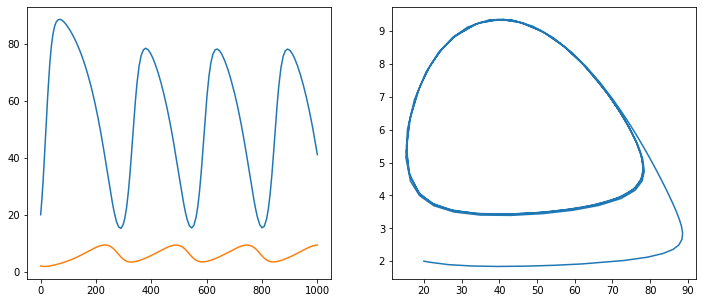

In [17]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
ax1.plot(solution.t, solution.y[0])      # N (prey population)
ax1.plot(solution.t, solution.y[1])      # P (predator population)
ax2.plot(solution.y[0], solution.y[1])   # P vs N


In [18]:
# Pretty smooth, and without specifying t-values! 
# And with relatively few data points: only 129
pandas.DataFrame({"t": solution.t, "N": solution.y[0], "P": solution.y[1]})

,t,N,P
0,0.000000,20.000000,2.000000
1,0.592852,20.654387,1.985145
2,1.185705,21.330977,1.971218
3,5.252752,26.492768,1.894917
4,9.319799,32.651461,1.853402
...,...,...,...
124,959.897099,61.377436,8.095697
125,971.387951,56.319836,8.617377
126,982.878803,50.646200,9.042319
127,994.369654,44.375147,9.308925


<br>
<br>
<br>
<br>
<br>


Note that for defining the function $f$, instead of the `N, P = state` trick above, you could also just use `y[0]` and `y[1]`, etc, as below: 

```python
def f(t, y):
    return ( 0.1*y[0]*(1 - y[0]/100) - 0.4*y[0]/(10 + y[0])*y[1], 
             0.1*y[0]/(10 + y[0])*y[1] - 0.08*y[1] )
```

But this is much uglier/less readable! 


<br>
<br>
<br>
<br>
<br>

<br>
<br>
<br>
<br>
<br>

<br>
<br>
<br>
<br>
<br>


## Finally, the code below demonstrates the older SciPy way
of simulating a differential equation, using `odeint`. This uses the LSODA solver, but it lacks a lot of the features of the newer `solve_ivp` interface. You probably shouldn't use this method, but it's mentioned here in case you see it used in sample code elsewhere on the internet. 

**Key differences:**
- The arguments to $f$ are reversed: for `odeint`, it's `f(state, t)` instead of `f(t, state)`. 
- You must specify the full list of $t$ values for which you want the output, like the second example above. The solver will still use its own step size internally, just like the above methods, but the results will only be sampled at the $t$ values you specify. 
- Instead of returning an object with several attributes, including `.t` and `.y` and possibly `.sol`, the `odeint` function just returns the array of $\vec{y}$ values. Furthermore, this array is the transpose of the `solution.y` array from `solve_ivp`. So to get the individual variables, you need to use `solution[:,0]`, `solution[:,1]`, etc. 


In [19]:
from scipy.integrate import odeint

In [20]:
def f(state, t):
    N, P = state
    return ( 0.1*N*(1 - N/100) - 0.4*N/(10 + N)*P, 0.1*N/(10 + N)*P - 0.08*P )

t_values = np.linspace(0, 1000, 2001)
initial_state = (20, 2)
solution = odeint(f, initial_state, t_values)


In [21]:
solution

array([[20.        ,  2.        ],
       [20.54105866,  1.98700468],
       [21.09764727,  1.97467461],
       ...,
       [44.04014506,  9.33484599],
       [43.75039034,  9.34159512],
       [43.45963764,  9.34787954]])

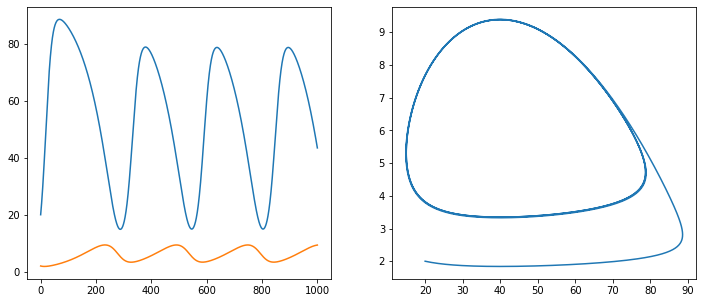

In [22]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
ax1.plot(t_values, solution[:,0])       # N (prey population)
ax1.plot(t_values, solution[:,1])       # P (predator population)
ax2.plot(solution[:,0], solution[:,1])  # P vs N
                                        